```
## Data organisation

In this workshop we will look at some data from the following paper:

Mantella, N. M., & Youngentob, S. L. (2014). Prenatal alcohol exposure increases postnatal acceptability of nicotine odor and taste in adolescent rats. PloS one, 9(7), e102255.

The title gives you a good sense of what the study is about -- rats were exposed to either prenatal alcohol or a normal diet, and then their response to a nicotine stimulus was tested (with sucrose as a control/placebo). Take a moment to look at the data spreadsheet.

These data are organised in a quite reasonable way -- they did four experiments and each gets its own sheet of the spreadsheet, and then within each sheet each row corresponds to an individual rat (measured at different stimulus concentrations). This is a little more complex than the csv style data that we have previously provided (and that statistics).

We will start by just looking at the third sheet. We need to load the tidyverse, janitor, and readxl packages.
```

In [1]:
library(readxl)
library(janitor)
library(ggplot2)
library(tidyr)
library(dplyr)
# library(data.table)
# library(readr)
# library(magrittr)

Warning message:
"package 'janitor' was built under R version 3.6.3"
Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## 1. Read xlsx file

In [2]:
nicotine_avg <- read_xlsx(path = 'data/Brief Access Lick Data.xlsx', 
                          sheet = 'Nicotine Average Lick Data')
str(nicotine_avg)
head(nicotine_avg, 3)
tail(nicotine_avg, 3)

tibble [38 x 10] (S3: tbl_df/tbl/data.frame)
 $ ANIMAL ID            : chr [1:38] "ETF1" "ETF2" "ETF5" "ETF6" ...
 $ PRENATAL EXPOSURE    : chr [1:38] "alcohol" "alcohol" "alcohol" "alcohol" ...
 $ WEIGHT               : num [1:38] 59 68 68 66 68 69 74 65 76 65 ...
 $ SEX                  : chr [1:38] "female" "female" "female" "female" ...
 $ AVERAGE LICKS (WATER): num [1:38] 54.5 71 67.2 56.2 70.2 ...
 $ AVERAGE LICKS (0.1mM): num [1:38] 54.8 70 67.8 50.2 26 ...
 $ AVERAGE LICKS (0.3mM): num [1:38] 34.4 30 35.2 47 68.8 ...
 $ AVERAGE LICKS (1.0mM): num [1:38] 46.2 69 50 56.6 51 49 52.4 68 53 53.2 ...
 $ AVERAGE LICKS (3.0mM): num [1:38] 13.6 35 30.3 48 38 ...
 $ AVERAGE LICKS (6.0mM): num [1:38] 9.33 37 21.5 29.8 7.25 ...


ANIMAL ID,PRENATAL EXPOSURE,WEIGHT,SEX,AVERAGE LICKS (WATER),AVERAGE LICKS (0.1mM),AVERAGE LICKS (0.3mM),AVERAGE LICKS (1.0mM),AVERAGE LICKS (3.0mM),AVERAGE LICKS (6.0mM)
ETF1,alcohol,59,female,54.50,54.80,34.40,46.2,13.60000,9.333333
ETF2,alcohol,68,female,71.00,70.00,30.00,69.0,35.00000,37.000000
ETF5,alcohol,68,female,67.25,67.75,35.25,50.0,30.33333,21.500000


ANIMAL ID,PRENATAL EXPOSURE,WEIGHT,SEX,AVERAGE LICKS (WATER),AVERAGE LICKS (0.1mM),AVERAGE LICKS (0.3mM),AVERAGE LICKS (1.0mM),AVERAGE LICKS (3.0mM),AVERAGE LICKS (6.0mM)
FCM9,free choice liquid diet,87,male,63.50000,56.83333,56.00000,60,55.80000,43.2
FCM10,free choice liquid diet,77,male,66.16667,67.50000,56.85714,62,31.33333,20.5
FCM11,free choice liquid diet,76,male,61.50000,55.75000,28.50000,36,24.00000,20.0


## 2. clean_names() and change column names

In [3]:
nicotine_avg <- clean_names(nicotine_avg)
str(nicotine_avg)
head(nicotine_avg, 3)
tail(nicotine_avg, 3)

tibble [38 x 10] (S3: tbl_df/tbl/data.frame)
 $ animal_id           : chr [1:38] "ETF1" "ETF2" "ETF5" "ETF6" ...
 $ prenatal_exposure   : chr [1:38] "alcohol" "alcohol" "alcohol" "alcohol" ...
 $ weight              : num [1:38] 59 68 68 66 68 69 74 65 76 65 ...
 $ sex                 : chr [1:38] "female" "female" "female" "female" ...
 $ average_licks_water : num [1:38] 54.5 71 67.2 56.2 70.2 ...
 $ average_licks_0_1m_m: num [1:38] 54.8 70 67.8 50.2 26 ...
 $ average_licks_0_3m_m: num [1:38] 34.4 30 35.2 47 68.8 ...
 $ average_licks_1_0m_m: num [1:38] 46.2 69 50 56.6 51 49 52.4 68 53 53.2 ...
 $ average_licks_3_0m_m: num [1:38] 13.6 35 30.3 48 38 ...
 $ average_licks_6_0m_m: num [1:38] 9.33 37 21.5 29.8 7.25 ...


animal_id,prenatal_exposure,weight,sex,average_licks_water,average_licks_0_1m_m,average_licks_0_3m_m,average_licks_1_0m_m,average_licks_3_0m_m,average_licks_6_0m_m
ETF1,alcohol,59,female,54.50,54.80,34.40,46.2,13.60000,9.333333
ETF2,alcohol,68,female,71.00,70.00,30.00,69.0,35.00000,37.000000
ETF5,alcohol,68,female,67.25,67.75,35.25,50.0,30.33333,21.500000


animal_id,prenatal_exposure,weight,sex,average_licks_water,average_licks_0_1m_m,average_licks_0_3m_m,average_licks_1_0m_m,average_licks_3_0m_m,average_licks_6_0m_m
FCM9,free choice liquid diet,87,male,63.50000,56.83333,56.00000,60,55.80000,43.2
FCM10,free choice liquid diet,77,male,66.16667,67.50000,56.85714,62,31.33333,20.5
FCM11,free choice liquid diet,76,male,61.50000,55.75000,28.50000,36,24.00000,20.0


In [4]:
# Note: if filter() exist in several packages
# (1) Use the default latest imported one
# (2) Specify package name: E. dplyr::filter

#### Manual change column names

In [5]:
names(nicotine_avg)

[1] "animal_id"            "prenatal_exposure"    "weight"              
 [4] "sex"                  "average_licks_water"  "average_licks_0_1m_m"
 [7] "average_licks_0_3m_m" "average_licks_1_0m_m" "average_licks_3_0m_m"
[10] "average_licks_6_0m_m"

In [6]:
print(names(nicotine_avg))

 [1] "animal_id"            "prenatal_exposure"    "weight"              
 [4] "sex"                  "average_licks_water"  "average_licks_0_1m_m"
 [7] "average_licks_0_3m_m" "average_licks_1_0m_m" "average_licks_3_0m_m"
[10] "average_licks_6_0m_m"


In [7]:
names(nicotine_avg)[5]

[1] "average_licks_water"

In [8]:
names(nicotine_avg)[5] <- 'avgLicks_0'

In [9]:
names(nicotine_avg)

[1] "animal_id"            "prenatal_exposure"    "weight"              
 [4] "sex"                  "avgLicks_0"           "average_licks_0_1m_m"
 [7] "average_licks_0_3m_m" "average_licks_1_0m_m" "average_licks_3_0m_m"
[10] "average_licks_6_0m_m"

In [10]:
names(nicotine_avg)[6] <- 'avgLicks_0.1'
names(nicotine_avg)[7] <- 'avgLicks_0.3'
names(nicotine_avg)[8] <- 'avgLicks_1'
names(nicotine_avg)[9] <- 'avgLicks_3'
names(nicotine_avg)[10] <- 'avgLicks_6'
names(nicotine_avg)

[1] "animal_id"         "prenatal_exposure" "weight"           
 [4] "sex"               "avgLicks_0"        "avgLicks_0.1"     
 [7] "avgLicks_0.3"      "avgLicks_1"        "avgLicks_3"       
[10] "avgLicks_6"

## 3. group_by

In [11]:
# group_by and summarise "count"
df_gb <- nicotine_avg %>%
            group_by(sex, prenatal_exposure) %>%
            summarise(count = n())
dim(df_gb)
df_gb

`summarise()` has grouped output by 'sex'. You can override using the `.groups` argument.


[1] 4 3

sex,prenatal_exposure,count
female,alcohol,9
female,free choice liquid diet,10
male,alcohol,10
male,free choice liquid diet,9


In [12]:
# group_by and summarise "count"
df_gb <- nicotine_avg %>%
            group_by(sex, prenatal_exposure) %>%
            summarise(count = n(), 
                      mean_weight = mean(weight), 
                      mean_avgLicks_0 = mean(avgLicks_0))
dim(df_gb)
df_gb

`summarise()` has grouped output by 'sex'. You can override using the `.groups` argument.


[1] 4 5

sex,prenatal_exposure,count,mean_weight,mean_avgLicks_0
female,alcohol,9,68.11111,63.72222
female,free choice liquid diet,10,72.10000,54.78667
male,alcohol,10,72.50000,59.20000
male,free choice liquid diet,9,78.00000,56.02778


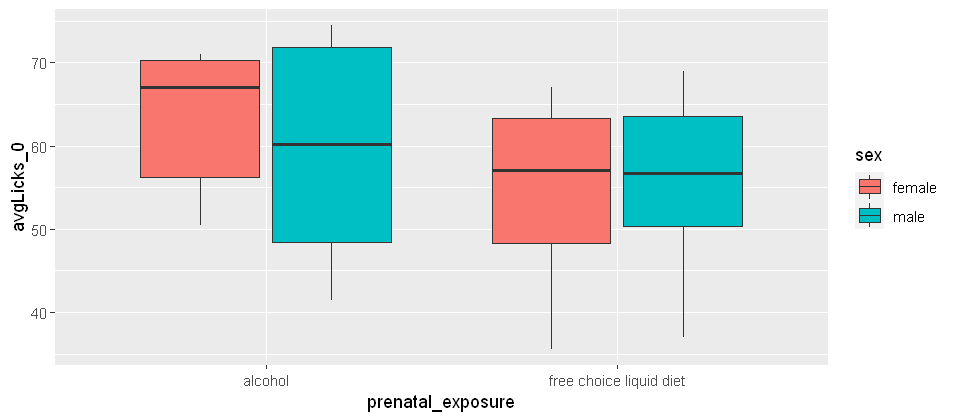

In [13]:
options(repr.plot.width = 8, repr.plot.height = 3.5)

ggplot(nicotine_avg, aes(x=prenatal_exposure, 
                         y=avgLicks_0,
                         fill=sex))+
geom_boxplot() 

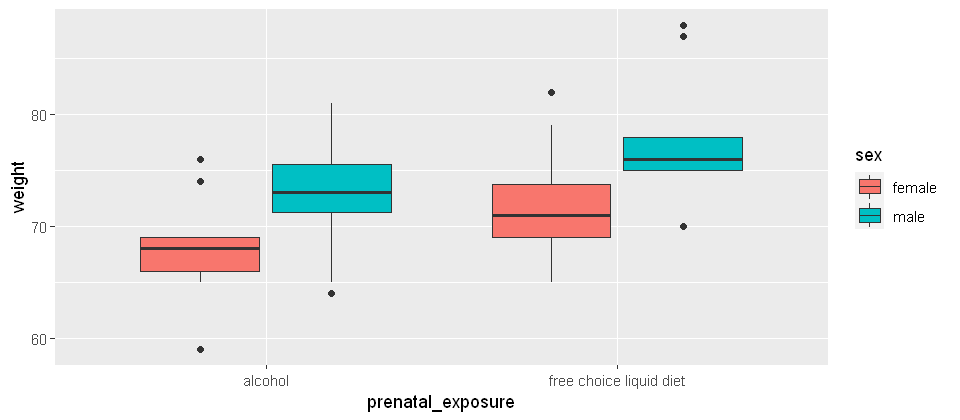

In [14]:
options(repr.plot.width = 8, repr.plot.height = 3.5)

ggplot(nicotine_avg, aes(x=prenatal_exposure, 
                         y=weight,
                         fill=sex))+
geom_boxplot() 

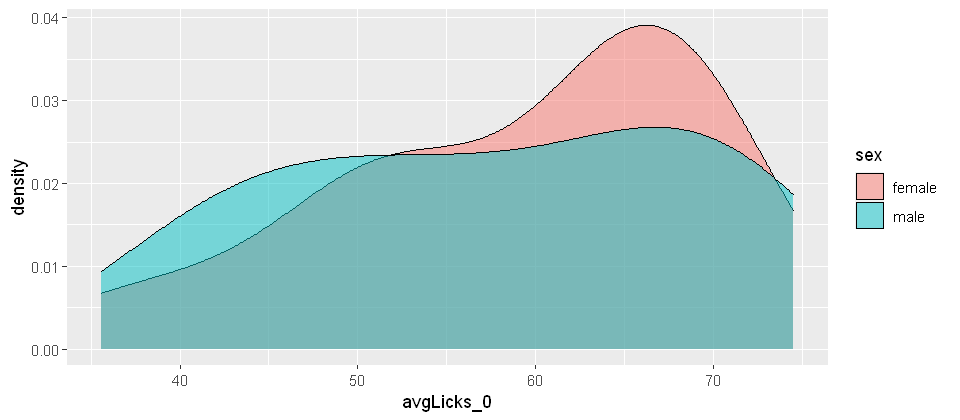

In [15]:
ggplot(nicotine_avg, 
       aes(x=avgLicks_0, 
           fill=sex)) +
   geom_density(alpha = 0.5)

In [16]:
names(nicotine_avg)

[1] "animal_id"         "prenatal_exposure" "weight"           
 [4] "sex"               "avgLicks_0"        "avgLicks_0.1"     
 [7] "avgLicks_0.3"      "avgLicks_1"        "avgLicks_3"       
[10] "avgLicks_6"

## 4. Pivot 

In [17]:
df_pivot <- nicotine_avg %>% 
pivot_longer(cols=starts_with('avgLicks'),
             names_to = 'concentration',
             names_prefix = 'avgLicks_', # to remove prefix 
             values_to = 'avgLicks'
            )
str(df_pivot)
head(df_pivot, 3)
tail(df_pivot, 3)

tibble [228 x 6] (S3: tbl_df/tbl/data.frame)
 $ animal_id        : chr [1:228] "ETF1" "ETF1" "ETF1" "ETF1" ...
 $ prenatal_exposure: chr [1:228] "alcohol" "alcohol" "alcohol" "alcohol" ...
 $ weight           : num [1:228] 59 59 59 59 59 59 68 68 68 68 ...
 $ sex              : chr [1:228] "female" "female" "female" "female" ...
 $ concentration    : chr [1:228] "0" "0.1" "0.3" "1" ...
 $ avgLicks         : num [1:228] 54.5 54.8 34.4 46.2 13.6 ...


animal_id,prenatal_exposure,weight,sex,concentration,avgLicks
ETF1,alcohol,59,female,0,54.5
ETF1,alcohol,59,female,0.1,54.8
ETF1,alcohol,59,female,0.3,34.4


animal_id,prenatal_exposure,weight,sex,concentration,avgLicks
FCM11,free choice liquid diet,76,male,1,36
FCM11,free choice liquid diet,76,male,3,24
FCM11,free choice liquid diet,76,male,6,20


#### change "concentration": char to numeric

In [18]:
df_pivot$concentration <- as.numeric(df_pivot$concentration)
str(df_pivot)
head(df_pivot, 3)
tail(df_pivot, 3)

tibble [228 x 6] (S3: tbl_df/tbl/data.frame)
 $ animal_id        : chr [1:228] "ETF1" "ETF1" "ETF1" "ETF1" ...
 $ prenatal_exposure: chr [1:228] "alcohol" "alcohol" "alcohol" "alcohol" ...
 $ weight           : num [1:228] 59 59 59 59 59 59 68 68 68 68 ...
 $ sex              : chr [1:228] "female" "female" "female" "female" ...
 $ concentration    : num [1:228] 0 0.1 0.3 1 3 6 0 0.1 0.3 1 ...
 $ avgLicks         : num [1:228] 54.5 54.8 34.4 46.2 13.6 ...


animal_id,prenatal_exposure,weight,sex,concentration,avgLicks
ETF1,alcohol,59,female,0.0,54.5
ETF1,alcohol,59,female,0.1,54.8
ETF1,alcohol,59,female,0.3,34.4


animal_id,prenatal_exposure,weight,sex,concentration,avgLicks
FCM11,free choice liquid diet,76,male,1,36
FCM11,free choice liquid diet,76,male,3,24
FCM11,free choice liquid diet,76,male,6,20


Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous x-axis"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 38 rows containing non-finite values (stat_smooth)."

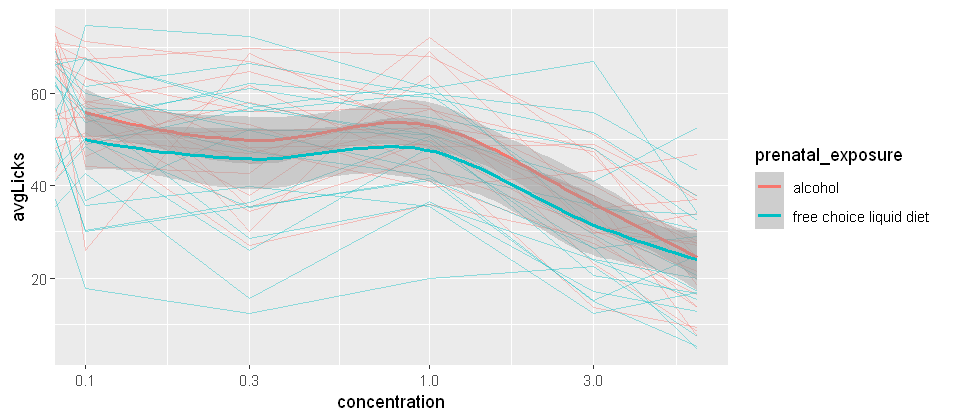

In [19]:
ggplot(df_pivot, aes(x = concentration, 
                     y = avgLicks, 
                     col = prenatal_exposure)) +
    geom_line(aes(group = animal_id), alpha = 0.4) + 
    scale_x_log10() + 
    geom_smooth()

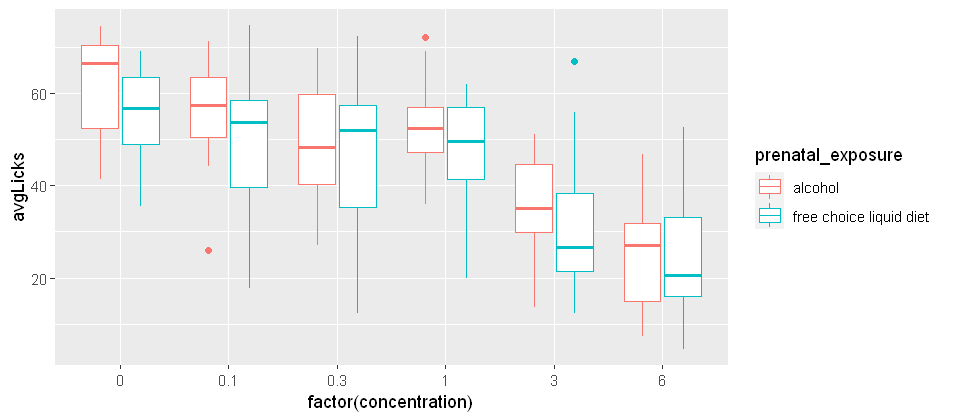

In [20]:
ggplot(df_pivot, aes(x = factor(concentration), 
                     y = avgLicks, 
                     col = prenatal_exposure)) +
    geom_boxplot()

## 5. Combine data

In [21]:
# bind_rows

df1 <- data.frame(a=c(0,1,2), b=c(3,4,5), c=c(6,7,8))
df1

a,b,c
0,3,6
1,4,7
2,5,8


In [22]:
df2 <- data.frame(aa=c(0,1,2), b=c(3,4,5), c=c(6,7,8))
df2

aa,b,c
0,3,6
1,4,7
2,5,8


In [23]:
bind_rows(df1, df2)

a,b,c,aa
0,3,6,NA
1,4,7,NA
2,5,8,NA
NA,3,6,0
NA,4,7,1
NA,5,8,2


In [24]:
# write_csv